<a href="https://colab.research.google.com/github/hvauchar/SAMHAR-COVID19-Hackathon/blob/master/DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My Drive/covid19
!pwd
!ls

In [4]:
import tensorflow as tf
print(tf.__version__)
import cv2
import seaborn as sns
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections

2.2.0-rc3


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# path = 'train/chest_xray/__MACOSX/chest_xray/train/'
path_train = 'train/chest_xray/train/'
path_test = 'train/chest_xray/test/'
path_val = 'train/chest_xray/val/'

In [0]:
CATEGORIES = ['NORMAL','PNEUMONIA']
IMG_SIZE=250
def distribution(dirlist):
  data_shape=[]
  c = 0
  for DATADIR in dirlist:
    for category in CATEGORIES:
      path = os.path.join(DATADIR,category)
      class_num = CATEGORIES.index(category)
      for img in os.listdir(path):
        try:
          img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
          a = img_array.shape
          data_shape.append([a[0],a[1]])
        except Exception as e:
          print(e)
  return(data_shape)
dirlist = [path_val,path_test,path_train]

In [0]:
data_shape = distribution(dirlist)

In [0]:
df = pd.DataFrame(data_shape, columns=["Height", "Width"])

In [0]:
normalized_df=(df-df.mean())/df.std()

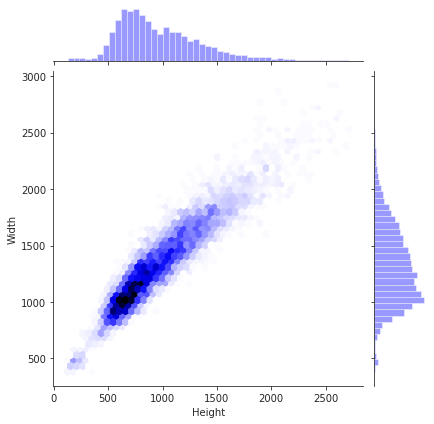

In [12]:
with sns.axes_style("ticks"):#white, dark, whitegrid, darkgrid, ticks
    sns.jointplot(x="Height", y="Width", data=df, kind="hex", color="b");#'scatter', 'reg', 'resid', 'kde', or 'hex'

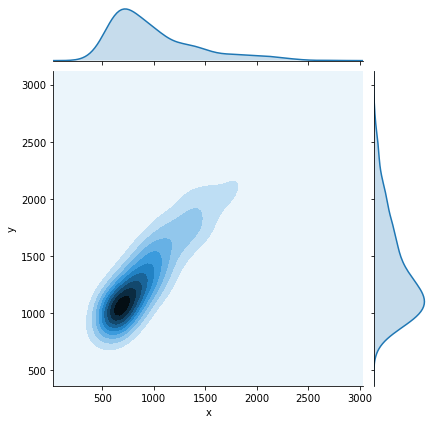

In [0]:
sns.jointplot(x="x", y="y", data=df, kind="kde");

In [13]:
CATEGORIES = ['NORMAL','PNEUMONIA']
IMG_SIZE=250
def count(dirlist):
  p = 0
  n = 0
  for DATADIR in dirlist:
    norm = CATEGORIES[0]
    path1 = os.path.join(DATADIR,norm)
    n += len(os.listdir(path1))
    pne = CATEGORIES[1]
    path2 = os.path.join(DATADIR,pne)
    p += len(os.listdir(path2))
  pn = p*100/(p+n)
  nn = n*100/(p+n)
  print(p,n)
  return(pn,nn)
dirlist = [path_val,path_test,path_train]
p, n = count(dirlist)
print(p,n)

4273 1583
72.96789617486338 27.032103825136613


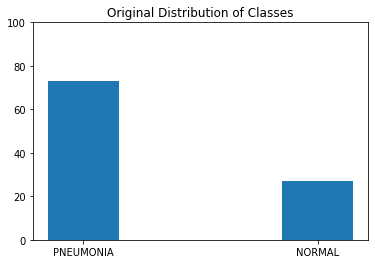

In [14]:
plt.ylim(0,100)
plt.bar(['PNEUMONIA','NORMAL'],[p,n],width=0.3)
plt.title('Original Distribution of Classes')
plt.show()